In [1]:
import torch
import numpy as np
from easy_transformer import EasyTransformer, EasyTransformerConfig
import easy_transformer
import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [38]:
vocab_size = 200
sequence_length = 10
batch_size = 64

tiny_cfg = EasyTransformerConfig(
    d_model=32,
    d_head=8,
    n_heads=4,
    d_mlp=32,
    n_layers=3,
    n_ctx=200,
    act_fn="solu_ln",
    d_vocab=vocab_size,
    normalization_type="LN",
    seed=0,
)
tiny_model = EasyTransformer(tiny_cfg).to(device)
cross_entropy_loss = torch.nn.CrossEntropyLoss(ignore_index=vocab_size - 1)

Moving model to device:  cpu
Moving model to device:  cpu


In [31]:
start_token = 0
sep_token = 1
ignore_token = 2
num_special_tokens = 3


In [32]:
from algorithmic_tasks.sort import gen
eval_inputs, eval_outputs = gen(1000,  tiny_model.cfg.d_vocab, 20)

In [33]:
eval_outputs

tensor([[  0,   0,   0,  ..., 180, 192, 195],
        [  0,   0,   0,  ..., 144, 173, 196],
        [  0,   0,   0,  ..., 169, 189, 190],
        ...,
        [  0,   0,   0,  ..., 185, 186, 193],
        [  0,   0,   0,  ..., 178, 183, 184],
        [  0,   0,   0,  ..., 170, 182, 187]])

In [34]:
def get_loss(model, inputs, outputs):
    inputs = inputs.to(device)
    outputs = outputs.to(device)
    
    output_logits = model(inputs, return_type="logits")

    seq_len = inputs.shape[1]

    loss = cross_entropy_loss(
        output_logits[:,:].reshape((-1,vocab_size)),
        outputs[:,:].reshape((-1,)))
    
    return loss

def evaluate_model(model, batch_size, print_output, number_to_print=0):
    vocab_size = model.cfg.d_vocab
    inputs,outputs = gen(batch_size,vocab_size,random.randint(5,98))

    loss = get_loss(model,inputs,outputs)

    if print_output:
      eval_loss = get_loss(model,eval_inputs, eval_outputs)
      print(eval_loss.item())

    return loss

In [41]:
loss_history = []
print('Start training')
tiny_optimizer = torch.optim.Adam(tiny_model.parameters(), lr=4e-3)
loss = evaluate_model(tiny_model, batch_size=3000, print_output=True)
for epoch in tqdm.tqdm(range(30000)):
    loss = evaluate_model(tiny_model, batch_size=batch_size, print_output=epoch % 300 == 0, number_to_print=0)
    loss.backward()
    loss_history.append(loss.item())
    tiny_optimizer.step()
    tiny_optimizer.zero_grad()

Start training
0.3816011846065521


  0%|                                                                                                             | 0/30000 [00:00<?, ?it/s]

0.3816011846065521


  1%|▉                                                                                                | 301/30000 [00:37<1:28:04,  5.62it/s]

0.3038899898529053


  2%|█▉                                                                                               | 601/30000 [01:16<1:23:29,  5.87it/s]

0.28712666034698486


  3%|██▉                                                                                                | 900/30000 [01:53<58:38,  8.27it/s]

0.26407957077026367


  4%|███▊                                                                                            | 1201/30000 [02:33<1:04:11,  7.48it/s]

0.2346225529909134


  5%|████▊                                                                                           | 1501/30000 [03:12<1:27:50,  5.41it/s]

0.2168845385313034


  6%|█████▊                                                                                          | 1801/30000 [03:51<1:18:47,  5.96it/s]

0.2535933256149292


  7%|██████▊                                                                                           | 2103/30000 [04:30<59:18,  7.84it/s]

0.18715178966522217


  8%|███████▊                                                                                          | 2401/30000 [05:11<47:20,  9.72it/s]

0.17686116695404053


  9%|████████▋                                                                                       | 2701/30000 [05:48<1:06:23,  6.85it/s]

0.17320923507213593


 10%|█████████▌                                                                                      | 3001/30000 [06:24<1:06:19,  6.79it/s]

0.16549398005008698


 11%|██████████▌                                                                                     | 3301/30000 [07:01<1:19:59,  5.56it/s]

0.1175876334309578


 12%|███████████▊                                                                                      | 3600/30000 [07:39<40:54, 10.75it/s]

0.13724035024642944


 13%|████████████▍                                                                                   | 3901/30000 [08:16<1:32:00,  4.73it/s]

0.10755593329668045


 14%|█████████████▍                                                                                  | 4201/30000 [08:54<1:03:00,  6.82it/s]

0.1041826531291008


 15%|██████████████▋                                                                                   | 4501/30000 [09:32<59:51,  7.10it/s]

0.10104682296514511


 16%|███████████████▋                                                                                  | 4802/30000 [10:11<58:23,  7.19it/s]

0.1158493310213089


 17%|████████████████▋                                                                                 | 5101/30000 [10:50<54:35,  7.60it/s]

0.11718136072158813


 18%|█████████████████▋                                                                                | 5401/30000 [11:30<58:27,  7.01it/s]

0.09488611668348312


 19%|██████████████████▏                                                                             | 5701/30000 [12:10<1:13:53,  5.48it/s]

0.08563919365406036


 20%|███████████████████▏                                                                            | 6001/30000 [12:49<1:13:00,  5.48it/s]

0.07735752314329147


 21%|████████████████████▌                                                                             | 6300/30000 [13:25<44:46,  8.82it/s]

0.08686527609825134


 22%|█████████████████████                                                                           | 6601/30000 [14:03<1:20:08,  4.87it/s]

0.072106271982193


 23%|██████████████████████                                                                          | 6901/30000 [14:39<1:09:09,  5.57it/s]

0.06825237721204758


 23%|██████████████████████▉                                                                           | 7025/30000 [14:56<48:52,  7.83it/s]


KeyboardInterrupt: 

In [74]:
torch.save(tiny_model,"sort.model")

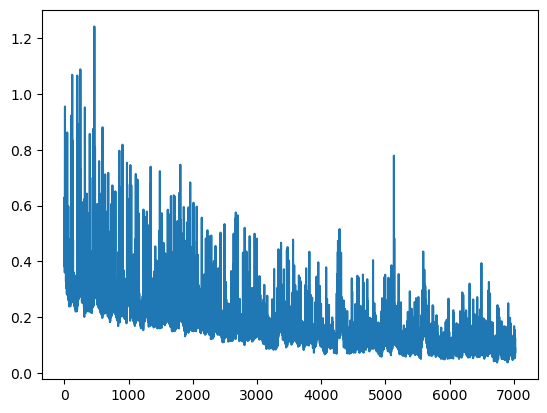

In [43]:
plt.plot(loss_history)

In [19]:
import pysvelte

def display_vectors(x,d=4):
    weights = torch.sum(x**3,dim=0)
    strongest = torch.argsort(weights)[-d:].flip(dims=(0,))
    plt.imshow(x.transpose(0,1)[strongest])
    plt.show()


def show_attention_pattern_for_input(model, inputs,outputs):
    model_cache={}
    model.cache_all(model_cache) # remove_batch_dim=True
    model(inputs)
    model.reset_hooks()
    
    pysvelte.AttentionMulti(tokens=[str(x) for x in inputs[0].tolist()], attention=model_cache['blocks.0.attn.hook_attn'][0].permute(1, 2, 0)).show()
    display_vectors(model_cache["blocks.0.mlp.hook_post"][0])
    
    pysvelte.AttentionMulti(tokens=[str(x) for x in inputs[0].tolist()], attention=model_cache['blocks.1.attn.hook_attn'][0].permute(1, 2, 0)).show()
    display_vectors(model_cache["blocks.1.mlp.hook_post"][0])
    
    pysvelte.AttentionMulti(tokens=[str(x) for x in inputs[0].tolist()], attention=model_cache['blocks.2.attn.hook_attn'][0].permute(1, 2, 0)).show()
    display_vectors(model_cache["blocks.2.mlp.hook_post"][0])

In [72]:
inputs,outputs = gen(3,vocab_size,40)
output_logits = tiny_model(inputs, return_type="logits")
predictions = output_logits.argmax(dim=2)

[[180  45  59  23 109  71 112 146  99  39 112  66  37 163 183  89  53  94
   25 108  54  66   6 145 146   8  74 190  74 160 138 163 132  45 128  31
   53 193 152  50 199   6   8  23  25  31  37  39  45  45  50  53  53  54
   59  66  66  71  74  74  89  94  99 108 109 112 112 128 132 138 145 146
  146 152 160 163 163 180 183 190]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   6   8  23  25  31  37  39  45  45  50  53  53  54  59
   66  66  71  74  74  89  94  99 108 109 112 112 128 132 138 145 146 146
  152 160 163 163 180 183 190 193]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   6   8  23  25  31  37  39  45  45  50  53  53  54  59
   66  66  71  74  74  89  94  99 108 109 112 112 128 132 138 144 146 146
  152 160 163 163 180 183 190 193]]


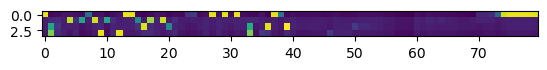

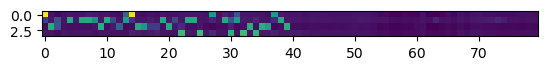

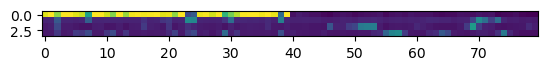

In [73]:
print(np.array([
    inputs[0].tolist(),
    outputs[0].tolist(),
    predictions[0].tolist()
  ]))

show_attention_pattern_for_input(tiny_model,inputs,outputs)

In [69]:
embeds = tiny_model.embed.W_E.detach().cpu()
embeds = embeds[:,torch.argsort(embeds[0])]
pca = torch.pca_lowrank(embeds,center=True,q=20)[0]

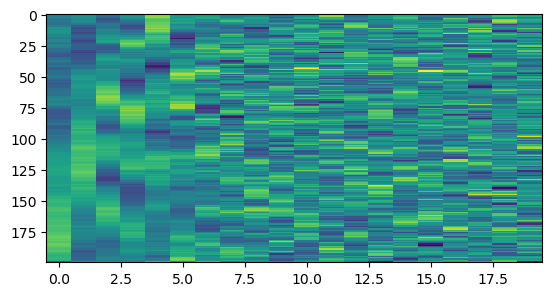

In [71]:
import matplotlib.pyplot as plt

plt.imshow(pca,aspect=0.05,interpolation="nearest")
#plt.plot(pca[:,0]-pca[:,1])

In [67]:
#model_cache={}
#tiny_model.cache_all(model_cache) # remove_batch_dim=True
inputs,outputs = gen(100,vocab_size,60)
output = tiny_model(inputs)
torch.mean(output**3).backward()
print((tiny_model.blocks[2].attn.z.grad.mean(dim=(0,1,3))))
#tiny_model.reset_hooks()

tensor([ 0.0024, -0.0018,  0.0018,  0.0019])


In [46]:
print(model_cache["blocks.0.attn.hook_z"][0].shape)
print(model_cache["blocks.0.hook_attn_out"][0].shape)
print(model_cache["blocks.0.hook_attn_out"][0].shape)
print(model_cache["blocks.0.mlp.hook_pre"][0].shape)

NameError: name 'model_cache' is not defined

In [ ]:
model_cache.keys()

In [ ]:
model_cache["blocks.0.attn.hook_z"].grad

In [ ]:
torch.tensor([2,3,4,5])>>2

In [18]:
tiny_model(torch.tensor([[5,4,2,7,8,2,199, 2, 2, 4, 5, 7]])).argmax(dim=2)

tensor([[0, 0, 0, 0, 0, 0, 2, 2, 4, 5, 7, 8]])